<a href="https://colab.research.google.com/github/anshg05/Machine-Learning-Lab/blob/main/bonus_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [25]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

In [26]:
# 2. Data Preprocessing
# Check for missing values
if df.isnull().sum().sum() == 0:
    print("No missing values found.")

No missing values found.


In [27]:
# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=50, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=50,
                       random_state=42)

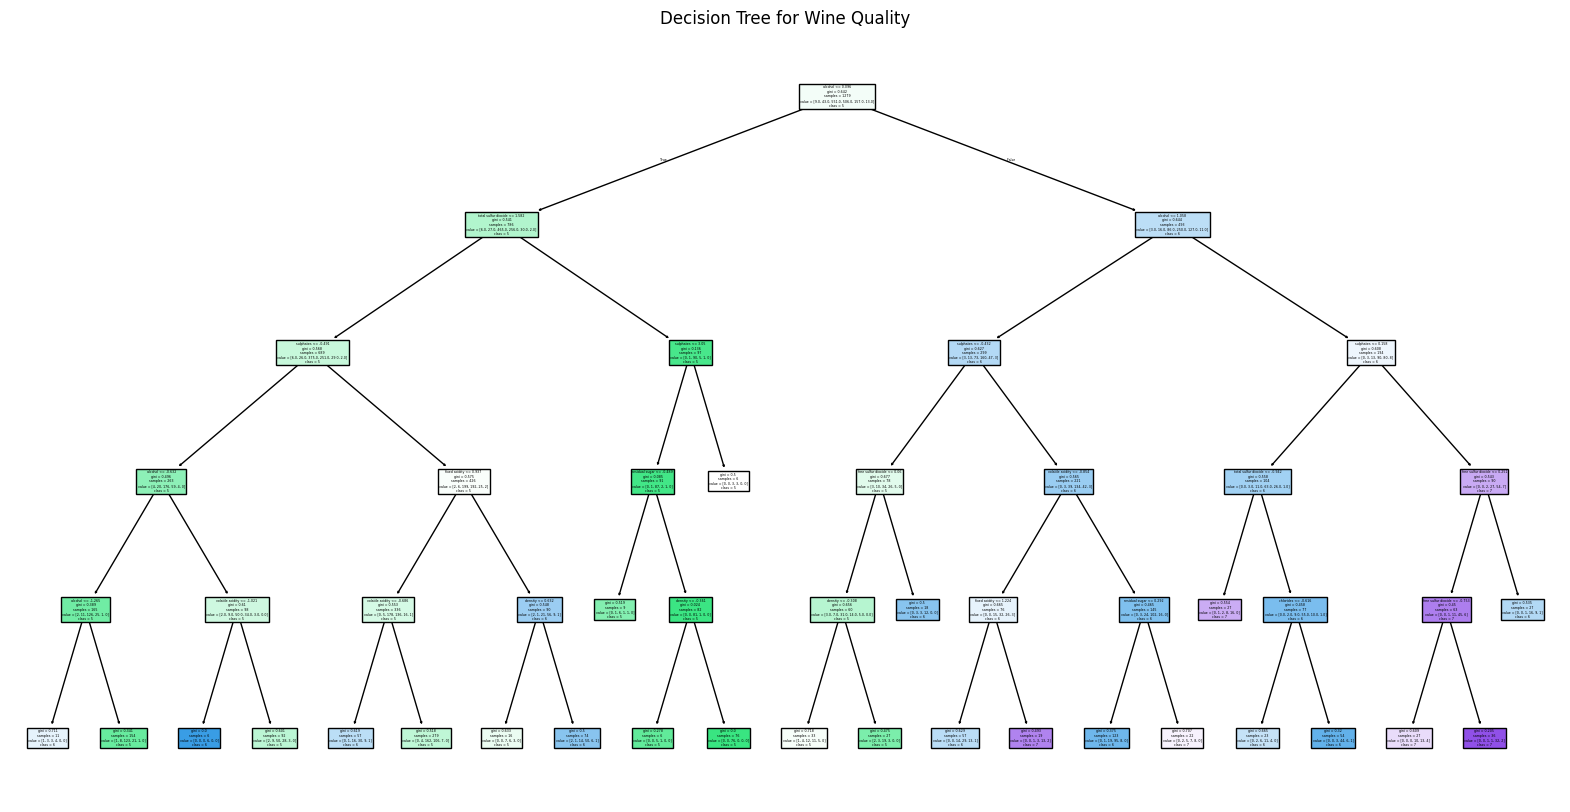

In [30]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.title("Decision Tree for Wine Quality")
plt.show()

In [31]:
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.55
Precision: 0.25
Recall: 0.26
F1 Score: 0.25

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.77      0.67       130
           6       0.53      0.50      0.52       132
           7       0.39      0.26      0.31        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.25      0.26      0.25       320
weighted avg       0.51      0.55      0.53       320



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [32]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.2f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-validation Accuracy: 0.60


In [33]:
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
print(f"Test Accuracy of Best Model: {accuracy_score(y_test, y_pred_best):.2f}")

Test Accuracy of Best Model: 0.55
